In [2]:
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
data=pd.read_csv('Final_Model_Data.csv')
print(data)

       DrugUse  MentalIllness  Age  EmploymentStatus  Sex  IncomeLevel  \
0            1              0    1                 1    1            1   
1            1              0    1                 1    1            1   
2            0              0    1                 1    0            1   
3            0              0    1                 1    1            1   
4            0              0    1                 0    0            1   
...        ...            ...  ...               ...  ...          ...   
25687        1              0    0                 0    0            1   
25688        0              1    1                 0    1            1   
25689        0              1    1                 1    1            1   
25690        1              1    1                 1    0            1   
25691        1              1    1                 0    0            1   

       UrbanRural  EducationLevel  
0               0               1  
1               1               1  
2  

In [15]:
data.head()

,DrugUse,MentalIllness,Age,EmploymentStatus,Sex,IncomeLevel,UrbanRural,EducationLevel
0,1,0,1,1,1,1,0,1
1,1,0,1,1,1,1,1,1
2,0,0,1,1,0,1,1,1
3,0,0,1,1,1,1,1,1
4,0,0,1,0,0,1,1,1


In [32]:
causal_graph = """strict digraph  {
Age;
EmploymentStatus;
IncomeLevel;
UrbanRural;
DrugUse;
MentalIllness;
Sex;
EducationLevel;
Age -> MentalIllness;
Age -> IncomeLevel;
Age -> EmploymentStatus;
IncomeLevel -> MentalIllness;
IncomeLevel -> DrugUse;
MentalIllness -> DrugUse;
EmploymentStatus -> IncomeLevel;
UrbanRural -> IncomeLevel;
Sex -> IncomeLevel;
EducationLevel ->EmploymentStatus;
Sex -> DrugUse;
UrbanRural -> EducationLevel;
}

"""

In [33]:
model=CausalModel(
        data = data,
        graph=causal_graph,
        treatment="MentalIllness",
        outcome="DrugUse")

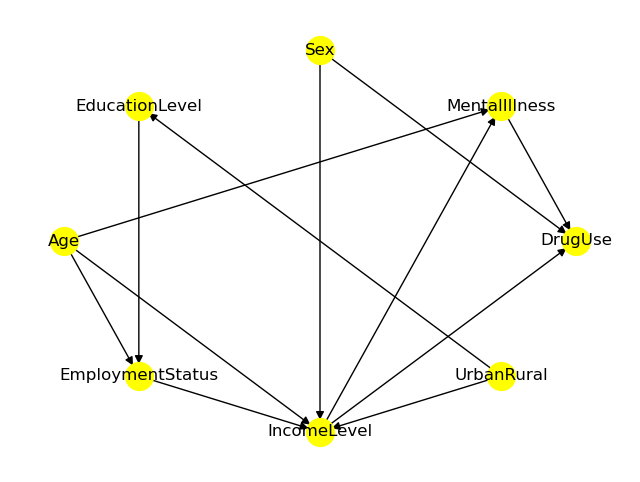

In [34]:
model.view_model()

In [35]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                    
────────────────(E[DrugUse|Age,IncomeLevel])
d[MentalIllness]                            
Estimand assumption 1, Unconfoundedness: If U→{MentalIllness} and U→DrugUse then P(DrugUse|MentalIllness,Age,IncomeLevel,U) = P(DrugUse|MentalIllness,Age,IncomeLevel)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [36]:
causal_estimate_att = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification",
        target_units = "atc")
print(causal_estimate_att)
print("Causal Estimate is " + str(causal_estimate_att.value))

propensity_score_stratification
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                    
────────────────(E[DrugUse|Age,IncomeLevel])
d[MentalIllness]                            
Estimand assumption 1, Unconfoundedness: If U→{MentalIllness} and U→DrugUse then P(DrugUse|MentalIllness,Age,IncomeLevel,U) = P(DrugUse|MentalIllness,Age,IncomeLevel)

## Realized estimand
b: DrugUse~MentalIllness+Age+IncomeLevel
Target units: atc

## Estimate
Mean value: 0.19738680420322774

Causal Estimate is 0.19738680420322774


/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
causal_estimate_reg = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        test_significance=True)
print(causal_estimate_reg)
print("Causal Estimate is " + str(causal_estimate_reg.value))

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': True, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                    
────────────────(E[DrugUse|Age,IncomeLevel])
d[MentalIllness]                            
Estimand assumption 1, Unconfoundedness: If U→{MentalIllness} and U→DrugUse then P(DrugUse|MentalIllness,Age,IncomeLevel,U) = P(DrugUse|MentalIllness,Age,IncomeLevel)

## Realized estimand
b: DrugUse~MentalIllness+Age+IncomeLevel
Target units: ate

## Estimate
Mean value: 0.1961926353398618
p-value: [6.03020175e-306]

Causal Estimate is 0.1961926353398618


In [38]:
refutation = model.refute_estimate(identified_estimand, 
                                   causal_estimate_att,
                                   method_name="placebo_treatment_refuter",
                                   placebo_type="permute", num_simulations=20)

/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d

In [39]:
print(refutation)

Refute: Use a Placebo Treatment
Estimated effect:0.19738680420322774
New effect:-0.0009214370157941172
p value:0.41336988543483166



In [31]:
res_random=model.refute_estimate(identified_estimand,causal_estimate_att, method_name="random_common_cause", show_progress_bar=True)
print(res_random)

/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d

/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d

/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d

/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d

Refute: Add a random common cause
Estimated effect:0.19574787203544874
New effect:0.19639361053491927
p value:0.7



In [13]:
print(res_random)

Refute: Add a random common cause
Estimated effect:0.10954175027932503
New effect:0.11101165744940648
p value:0.44

